In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"D:\Data_Science\Assignments\Decision Tree\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Applying statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Adding label column

In [8]:
df['label']=np.where(df['Taxable.Income']<=30000,'risky','good')

In [9]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,label
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [10]:
df.label.value_counts()

good     476
risky    124
Name: label, dtype: int64

# Encoding

In [11]:
df.iloc[:,[0,1,5,6]]=pd.get_dummies(df.iloc[:,[0,1,5,6]],drop_first=True)

In [12]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,label
0,0,0,68833,50047,10,1,1
1,1,0,33700,134075,18,0,1
2,0,1,36925,160205,30,0,1
3,1,0,50190,193264,15,1,1
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,0,1
596,1,0,69967,55369,2,0,1
597,0,0,47334,154058,0,0,1
598,1,1,98592,180083,17,0,0


# Correlation Analysis

In [13]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,label
Undergrad,1.000000,0.015120,-0.049232,0.079579,-0.005362,0.028883,-0.000267
Marital.Status,0.015120,1.000000,-0.100611,-0.007035,0.033347,-0.520317,0.016771
Taxable.Income,-0.049232,-0.100611,1.000000,-0.064387,-0.001818,0.037910,0.070628
City.Population,0.079579,-0.007035,-0.064387,1.000000,0.013135,0.002087,-0.040098
Work.Experience,-0.005362,0.033347,-0.001818,0.013135,1.000000,-0.018123,-0.094559
Urban,0.028883,-0.520317,0.037910,0.002087,-0.018123,1.000000,0.047014
label,-0.000267,0.016771,0.070628,-0.040098,-0.094559,0.047014,1.000000


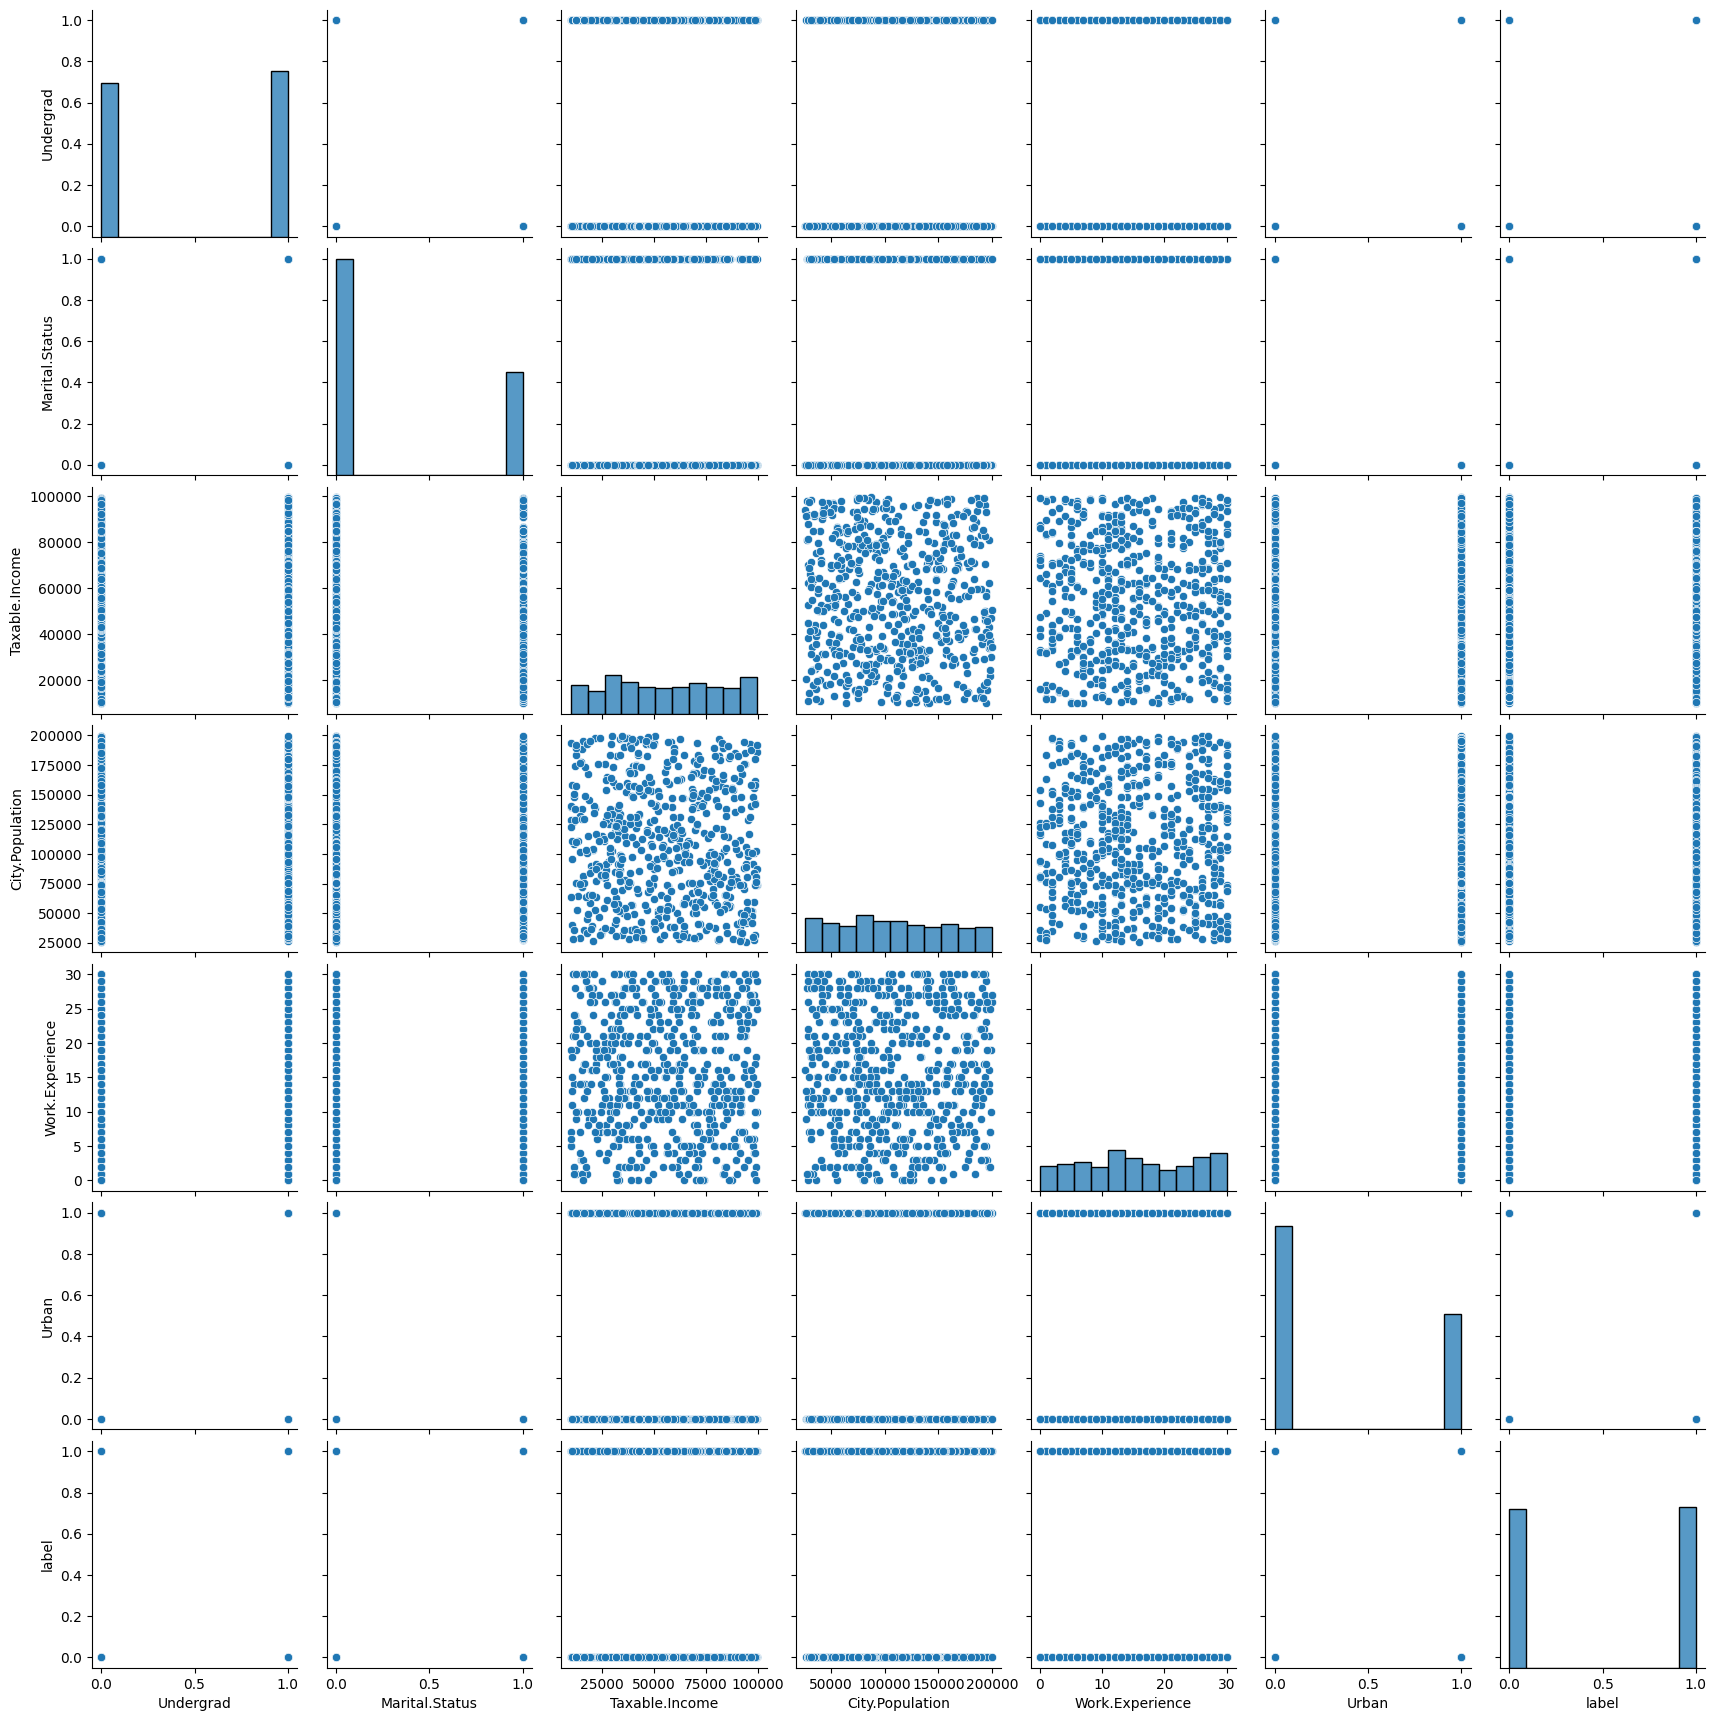

In [14]:
sns.pairplot(df)

<Axes: >

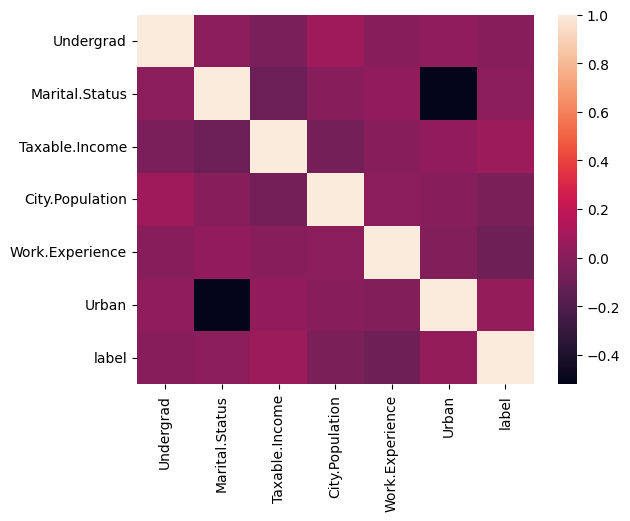

In [15]:
sns.heatmap(df.corr())

# Dividing into dependepnt and independent

In [16]:
X=df.iloc[:,:-1]
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,0,33700,134075,18,0
2,0,1,36925,160205,30,0
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,0
596,1,0,69967,55369,2,0
597,0,0,47334,154058,0,0
598,1,1,98592,180083,17,0


In [17]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: label, Length: 600, dtype: uint8

# Standardizing data

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.040833  , -0.6912543 ,  0.52036187, -1.17852072, -0.62914254,
         1.32852435],
       [ 0.96076892, -0.6912543 , -0.82146395,  0.50850002,  0.27636996,
        -0.75271484],
       [-1.040833  ,  1.4466456 , -0.69829233,  1.03310911,  1.63463872,
        -0.75271484],
       ...,
       [-1.040833  , -0.6912543 , -0.30074402,  0.90969648, -1.76103318,
        -0.75271484],
       [ 0.96076892,  1.4466456 ,  1.65693986,  1.43219749,  0.1631809 ,
        -0.75271484],
       [-1.040833  , -0.6912543 ,  1.57776629,  0.9915901 ,  0.04999184,
        -0.75271484]])

# Splitting into train test

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train

array([[-1.040833  , -0.6912543 ,  1.12923066,  0.46609764, -0.62914254,
        -0.75271484],
       [ 0.96076892,  1.4466456 ,  0.59331002,  0.31505921, -0.17638629,
        -0.75271484],
       [ 0.96076892,  1.4466456 , -0.15966001,  0.6600203 ,  1.52144966,
        -0.75271484],
       ...,
       [-1.040833  ,  1.4466456 , -0.94490291,  0.44033899, -1.19508786,
        -0.75271484],
       [-1.040833  , -0.6912543 ,  1.38787195,  0.06076535, -1.30827692,
        -0.75271484],
       [ 0.96076892, -0.6912543 , -0.86110802, -0.34651441,  0.84231528,
        -0.75271484]])

In [20]:
X_test

array([[-1.040833  , -0.6912543 , -1.17066024, -1.53181372,  0.38955903,
         1.32852435],
       [-1.040833  ,  1.4466456 ,  0.49882116,  0.5887875 ,  0.50274809,
        -0.75271484],
       [-1.040833  , -0.6912543 ,  0.33241536, -1.55964029,  1.4082606 ,
        -0.75271484],
       [ 0.96076892,  1.4466456 , -0.90709209,  0.1926705 ,  1.18188247,
        -0.75271484],
       [-1.040833  , -0.6912543 , -0.9802312 , -1.45821185,  0.50274809,
        -0.75271484],
       [-1.040833  , -0.6912543 , -1.50996461,  1.59883566,  0.72912622,
        -0.75271484],
       [-1.040833  , -0.6912543 , -0.97301277, -0.12337987,  0.38955903,
         1.32852435],
       [ 0.96076892, -0.6912543 ,  1.13190415, -0.86853357, -0.28957535,
         1.32852435],
       [ 0.96076892, -0.6912543 ,  0.69520827,  0.69075801, -1.76103318,
        -0.75271484],
       [ 0.96076892, -0.6912543 , -1.51691569, -0.73265319,  1.63463872,
        -0.75271484],
       [ 0.96076892, -0.6912543 , -1.34756905, -0.

In [21]:
y_train

593    1
531    1
353    0
332    0
534    1
      ..
71     0
106    1
270    0
435    1
102    0
Name: label, Length: 450, dtype: uint8

# Hyper parameter tunning

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [2,3, 5, 7, 10],
    'n_estimators':[50,100,200,300],
    'criterion': ['gini', 'entropy']
}

In [42]:
# Create a decision tree classifier
rf= RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [43]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 100}

# Building Random Forest model

In [54]:
rf=RandomForestClassifier(criterion='gini',max_depth=2,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

In [55]:
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=uint8)

# Model Validation

In [56]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.54


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        76
           1       0.54      0.50      0.52        74

    accuracy                           0.54       150
   macro avg       0.54      0.54      0.54       150
weighted avg       0.54      0.54      0.54       150

